# Linear Regression in PyTorch 




In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt 
import scienceplots
plt.style.use(['science', 'notebook'])

In [2]:
# set Torch device to either cpu/mps for Apple Silicon /cuda for Nvidia GPUs
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)

mps


# Linear Model Setup 

A linear model can be described by a straight line 

\begin{align}
y =  mx + c
\end{align}

where $m$ and $c$ are the slop and y-intercept. In linear regression problems, we want to infer the values of $m$ and $c$ given the dataset $\{(x_i, y_i)\}^{N}_{i=1}$. 

1. Initialize $x_i$
2. Generate $y_i$ by adding noise $W$ to $(m x_i + c ) + W$, where $m$ and $c$ here are the 'real/theoretical' values 
3. Infer the $m'$ and $c'$ by the linear regression model in PyTorch, where $m',c'$ are the predicted values. 

In [3]:
x = torch.rand(10)*100
m, c = 2, 1 
y = m*x + c 

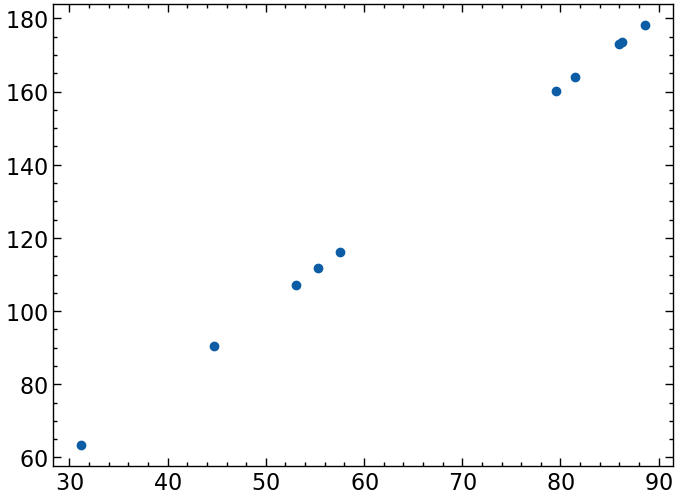

In [4]:
plt.scatter(x.cpu(), y.cpu())

In [5]:
# the perturbed y's 
y_obs =  y + torch.normal(0,5,size=y.shape)

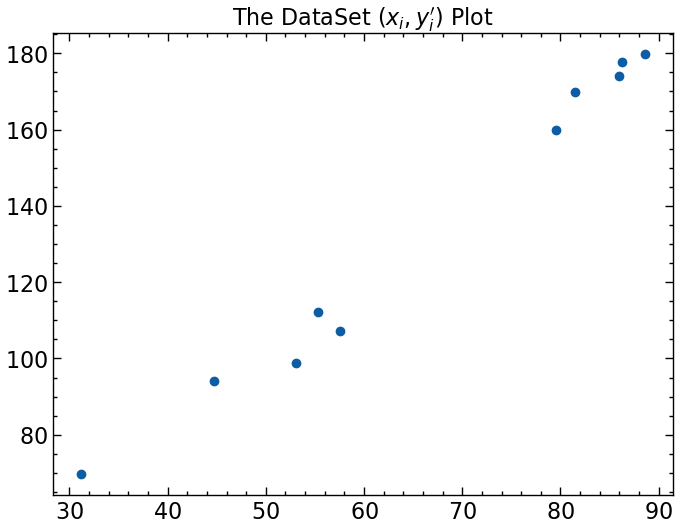

In [6]:
plt.title(r"The DataSet $(x_i, y_i')$ Plot")
plt.scatter(x.cpu(), y_obs.cpu())

# Design Linear Regression Model in Torch 


In [7]:
import torch
import torch.optim as optim

class LinearRegression:
    def __init__(self):
        self.w = torch.tensor(0.0, requires_grad=True)  # Weight
        self.b = torch.tensor(0.0, requires_grad=True)  # Bias
        self.optimizer = optim.SGD([self.w, self.b], lr=0.01)

    def forward(self, x):
        return self.w * x + self.b

    def train(self, x, y, num_epochs):
        for epoch in range(num_epochs):
            # Forward pass
            y_pred = self.forward(x)

            # Calculate the loss (mean squared error)
            loss = torch.mean((y_pred - y) ** 2)

            # Backward pass and optimization
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            # Print the loss for every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

        # Print the learned parameters
        print(f'Learned parameters: w = {self.w.item():.4f}, b = {self.b.item():.4f}')

# Define the input data
x = torch.rand(100) 
m, c = 2, 1
y = m * x + c
y[:] += torch.normal(0, 0.02, size=y.shape)


# Create an instance of LinearRegression
model = LinearRegression()

# Train the model
model.train(x, y, num_epochs=100)

Epoch [10/100], Loss: 2.6202
Epoch [20/100], Loss: 1.6337
Epoch [30/100], Loss: 1.0335
Epoch [40/100], Loss: 0.6680
Epoch [50/100], Loss: 0.4449
Epoch [60/100], Loss: 0.3085
Epoch [70/100], Loss: 0.2247
Epoch [80/100], Loss: 0.1728
Epoch [90/100], Loss: 0.1404
Epoch [100/100], Loss: 0.1198
Learned parameters: w = 0.8764, b = 1.3930


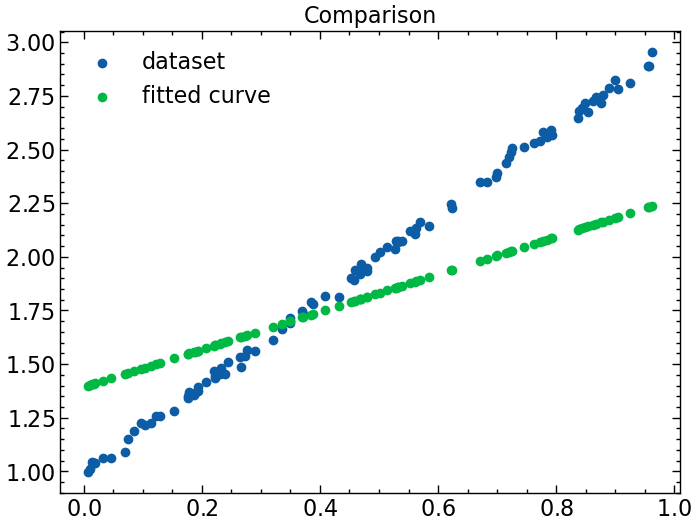

In [8]:
plt.title("Comparison")
plt.scatter(x.cpu(), y.cpu(), label="dataset")
plt.scatter(x.cpu(), (x *model.w + model.b).detach().numpy(), label='fitted curve')
plt.legend()

Epoch [10/100], Loss: 0.1064
Epoch [20/100], Loss: 0.0974
Epoch [30/100], Loss: 0.0911
Epoch [40/100], Loss: 0.0865
Epoch [50/100], Loss: 0.0828
Epoch [60/100], Loss: 0.0799
Epoch [70/100], Loss: 0.0773
Epoch [80/100], Loss: 0.0750
Epoch [90/100], Loss: 0.0729
Epoch [100/100], Loss: 0.0710
Learned parameters: w = 1.0658, b = 1.4498
Epoch [10/1000], Loss: 0.0691
Epoch [20/1000], Loss: 0.0673
Epoch [30/1000], Loss: 0.0655
Epoch [40/1000], Loss: 0.0638
Epoch [50/1000], Loss: 0.0622
Epoch [60/1000], Loss: 0.0606
Epoch [70/1000], Loss: 0.0591
Epoch [80/1000], Loss: 0.0576
Epoch [90/1000], Loss: 0.0561
Epoch [100/1000], Loss: 0.0547
Epoch [110/1000], Loss: 0.0533
Epoch [120/1000], Loss: 0.0519
Epoch [130/1000], Loss: 0.0506
Epoch [140/1000], Loss: 0.0493
Epoch [150/1000], Loss: 0.0481
Epoch [160/1000], Loss: 0.0468
Epoch [170/1000], Loss: 0.0456
Epoch [180/1000], Loss: 0.0445
Epoch [190/1000], Loss: 0.0434
Epoch [200/1000], Loss: 0.0423
Epoch [210/1000], Loss: 0.0412
Epoch [220/1000], Loss: 

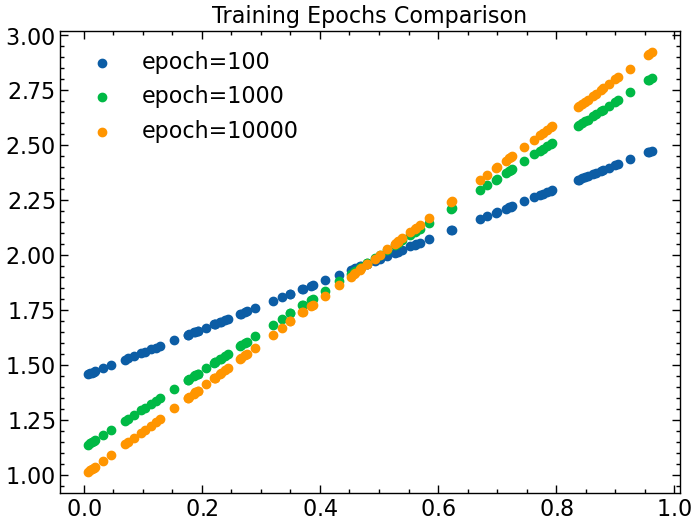

In [9]:
plt.title('Training Epochs Comparison')
for epochs in [100,1000,10000]: 
    model.train(x, y, num_epochs=epochs)
    plt.scatter(x.cpu(), (x *model.w + model.b).detach().numpy(), label='epoch='+str(epochs))
    plt.legend()
    
    